In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV ,train_test_split
import pickle

from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,
                             f1_score,cohen_kappa_score,roc_auc_score,roc_curve)

import warnings
warnings.filterwarnings('ignore')

In [153]:
df=pd.read_csv(r'C:\Users\MY\Downloads\archive (1)\Train.csv')

In [154]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [155]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [156]:
df.drop(columns='ID',inplace=True)

In [157]:
cols

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [158]:
cat_cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Prior_purchases',
       'Product_importance', 'Gender', 
       'Reached.on.Time_Y.N']
num_cols=['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [159]:
for i in cat_cols:
    print(f"Coloumn name {i}")
    print(df[i].value_counts())
    print("\n")

Coloumn name Warehouse_block
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


Coloumn name Mode_of_Shipment
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


Coloumn name Customer_care_calls
Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64


Coloumn name Customer_rating
Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64


Coloumn name Prior_purchases
Prior_purchases
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: count, dtype: int64


Coloumn name Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


Coloumn name Gender
Gender
F    5545
M    5454
Name: count, dtype: int64


Coloumn name Reached.on.Time_Y.N
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64




In [160]:
dummy_encoing=['Mode_of_Shipment','Gender']
frequency_encoding=['Warehouse_block', 'Customer_care_calls','Customer_rating', 'Prior_purchases']
lable_encoding=['Product_importance']

In [161]:
'''
for i in frequency_encoding:
    map_dict=df[i].value_counts(normalize=True).to_dict()
    df[i]=df[i].map(map_dict)
'''

df['Product_importance']=df['Product_importance'].map({'low':0,'medium':1,'high':2})

In [162]:
df=pd.get_dummies(df,drop_first=True,dtype=int)

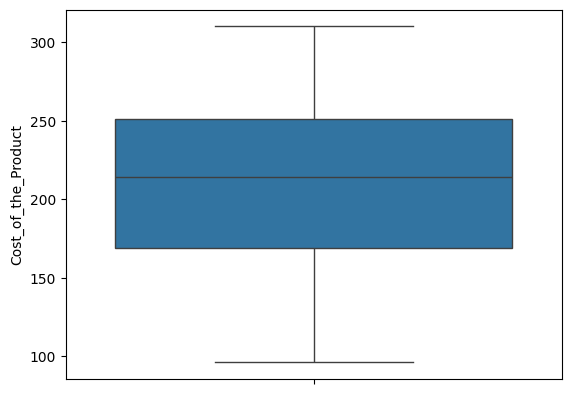

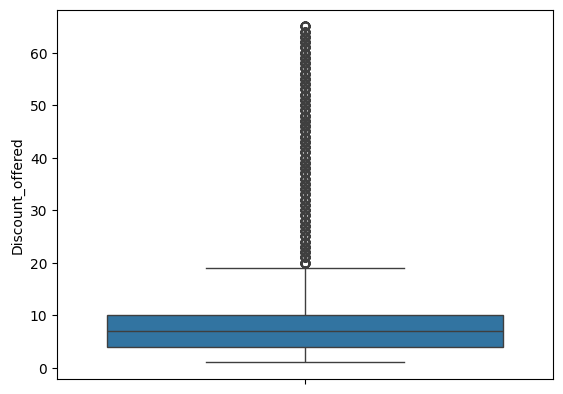

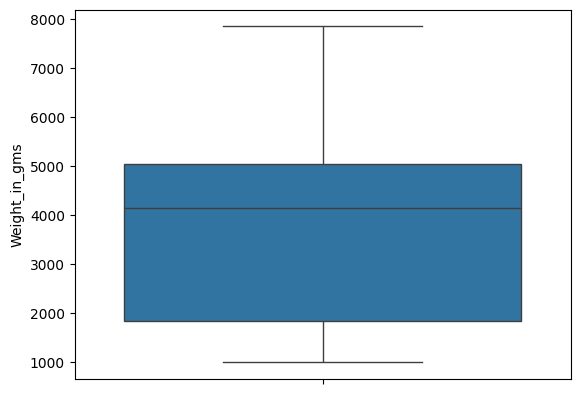

In [163]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [164]:
q3,q1=np.percentile(df['Discount_offered'],(75,25))
iqr=q3-q1
ul=q3+iqr*3.5
df['Discount_offered']=df['Discount_offered'].apply(lambda x:ul if x>ul else x)

<Axes: >

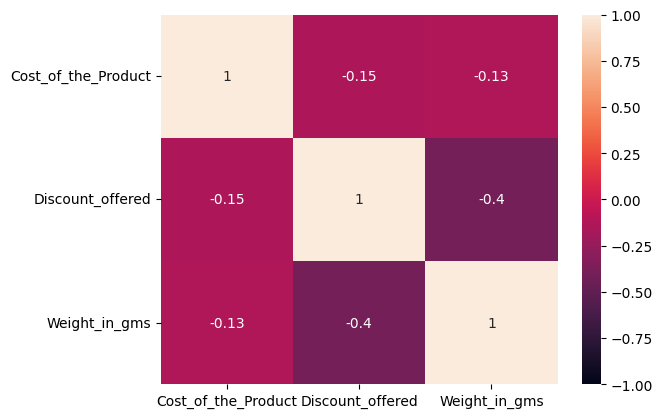

In [165]:
sns.heatmap(df[num_cols].corr(),vmax=1,vmin=-1,annot=True)

In [166]:
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M
0,4,2,177,3,0,31.0,1233,1,0,0,1,0,0,0,0
1,4,5,216,2,0,31.0,3088,1,0,0,0,1,0,0,1
2,2,2,183,4,0,31.0,3374,1,0,0,0,0,0,0,1
3,3,3,176,4,1,10.0,1177,1,1,0,0,0,0,0,1
4,2,2,184,3,1,31.0,2484,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1.0,1538,1,0,0,0,0,0,1,0
10995,4,1,232,5,1,6.0,1247,0,1,0,0,0,0,1,0
10996,5,4,242,5,0,4.0,1155,0,0,1,0,0,0,1,0
10997,5,2,223,6,1,2.0,1210,0,0,0,0,1,0,1,1


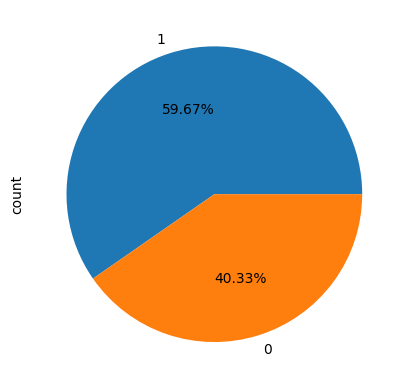

In [167]:
df['Reached.on.Time_Y.N'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

In [168]:
y=df['Reached.on.Time_Y.N']
x=df.drop(columns='Reached.on.Time_Y.N')

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=24)

In [170]:
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)

(2200, 14) (2200,) (8799, 14) (8799,)


## Predictive Modeling

In [171]:
mod=[]
accu=[]
recall=[]
precision=[]
cohen_kappa=[]
f1=[]


def model_training(model,xtrain,ytrain,xtest,ytest):
    trained_model=model
    trained_model.fit(xtrain,ytrain)

    pred_h=trained_model.predict(xtest)
    pred_s=trained_model.predict_proba(xtest)[:,1]

    print("Confusion_matrix :\n",confusion_matrix(ytest,pred_h))
    print("\nClassification Report\n",classification_report(ytest,pred_h))

    fpr,tpr,thres=roc_curve(ytest,pred_s)

    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f"ROC AUC {np.round(roc_auc_score(ytest,pred_s),2)}")
    plt.show()

    #y_n=input("Do you want to save the result? Y/N")
    y_n='y'
    if y_n.lower()=='y':
        accu.append(accuracy_score(ytest,pred_h))
        mod.append(str(model))
        recall.append(recall_score(ytest,pred_h))
        precision.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        cohen_kappa.append(cohen_kappa_score(ytest,pred_h))

        global scorecard

        scorecard=pd.DataFrame({"Accuracy":accu,"Precision":precision,"Recall":recall,"F1 Score":f1,"Cohen_Kappa Score":cohen_kappa},index=mod)
    else:
        return


In [172]:
def tunning_Parameters(grid,estimator,x,y,score='accuracy'):
    gscv=GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_


Logistic Regression

Confusion_matrix :
 [[474 389]
 [420 917]]

Classification Report
               precision    recall  f1-score   support

           0       0.53      0.55      0.54       863
           1       0.70      0.69      0.69      1337

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



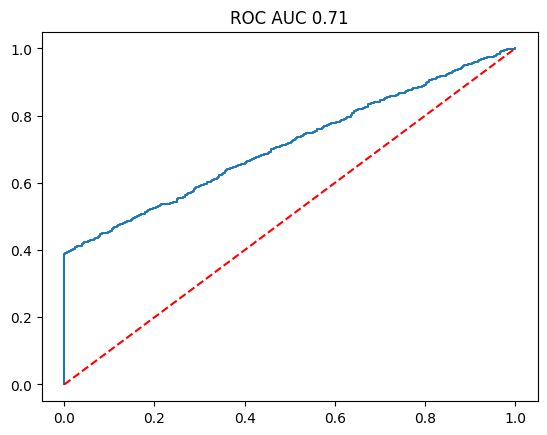

In [173]:
model_training(LogisticRegression(),x_train,y_train,x_test,y_test)

Naive Bayes

Confusion_matrix :
 [[793  70]
 [732 605]]

Classification Report
               precision    recall  f1-score   support

           0       0.52      0.92      0.66       863
           1       0.90      0.45      0.60      1337

    accuracy                           0.64      2200
   macro avg       0.71      0.69      0.63      2200
weighted avg       0.75      0.64      0.63      2200



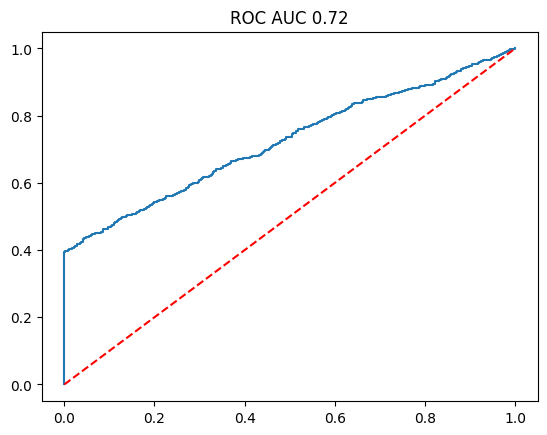

In [174]:
model_training(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion_matrix :
 [[629 234]
 [519 818]]

Classification Report
               precision    recall  f1-score   support

           0       0.55      0.73      0.63       863
           1       0.78      0.61      0.68      1337

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.69      0.66      0.66      2200



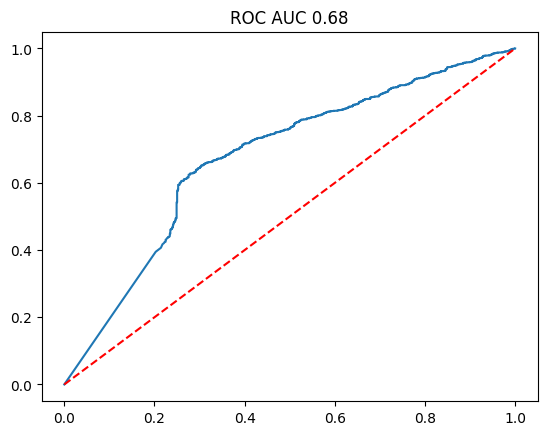

In [175]:
model_training(MultinomialNB(),x_train,y_train,x_test,y_test)

Decision Tree


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Confusion_matrix :
 [[790  73]
 [655 682]]

Classification Report
               precision    recall  f1-score   support

           0       0.55      0.92      0.68       863
           1       0.90      0.51      0.65      1337

    accuracy                           0.67      2200
   macro avg       0.73      0.71      0.67      2200
weighted avg       0.76      0.67      0.66      2200



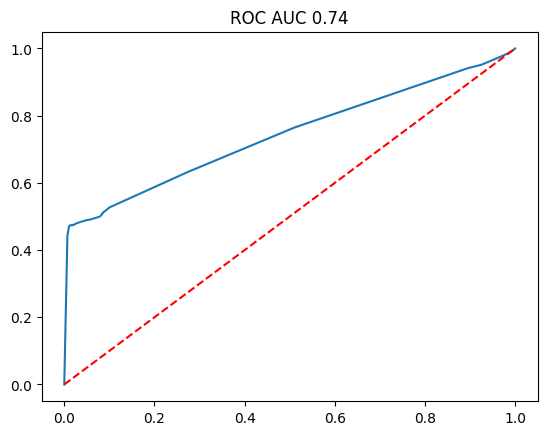

In [176]:
DT_parms=tunning_Parameters(grid={'max_depth':[7,8,9,10,11,12]},estimator=DecisionTreeClassifier(),x=x_train,y=y_train)
model_training(DecisionTreeClassifier(**DT_parms),x_train,y_train,x_test,y_test)

Random Forest

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Confusion_matrix :
 [[825  38]
 [667 670]]

Classification Report
               precision    recall  f1-score   support

           0       0.55      0.96      0.70       863
           1       0.95      0.50      0.66      1337

    accuracy                           0.68      2200
   macro avg       0.75      0.73      0.68      2200
weighted avg       0.79      0.68      0.67      2200



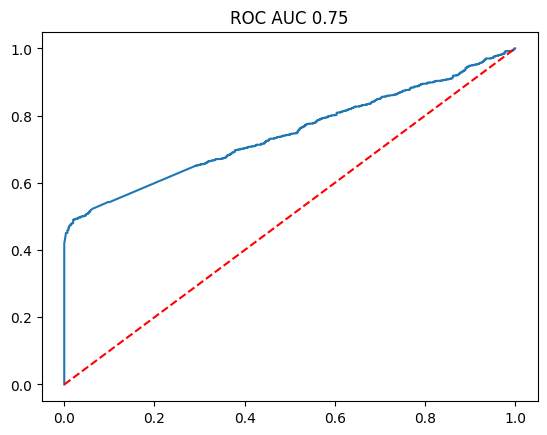

In [177]:
RF_parms=tunning_Parameters(grid={'max_depth':[3,4,5],'n_estimators':[70,75,80,85,90]},
                              estimator=RandomForestClassifier(max_features=None),x=x_train,y=y_train)
model_training(RandomForestClassifier(**RF_parms,max_features=None),x_train,y_train,x_test,y_test)

Ada Boost

In [178]:
Ada_parms

{'learning_rate': 0.1, 'n_estimators': 150}

In [179]:
Ada_parms=tunning_Parameters(grid={'n_estimators':[100,120,130,140,150],'learning_rate':[0.01,0.05,0.07,0.1]},
                                    estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),x=x_train,y=y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Confusion_matrix :
 [[450 413]
 [377 960]]

Classification Report
               precision    recall  f1-score   support

           0       0.54      0.52      0.53       863
           1       0.70      0.72      0.71      1337

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



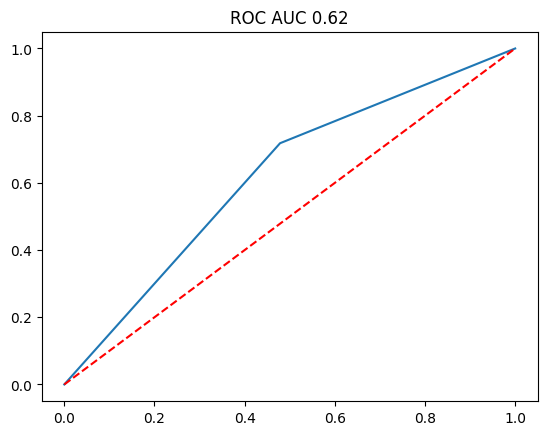

In [180]:
model_training(AdaBoostClassifier(estimator=DecisionTreeClassifier(),**Ada_parms),x_train,y_train,x_test,y_test)

Gradient Boosting Classifier

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Confusion_matrix :
 [[804  59]
 [645 692]]

Classification Report
               precision    recall  f1-score   support

           0       0.55      0.93      0.70       863
           1       0.92      0.52      0.66      1337

    accuracy                           0.68      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.78      0.68      0.68      2200



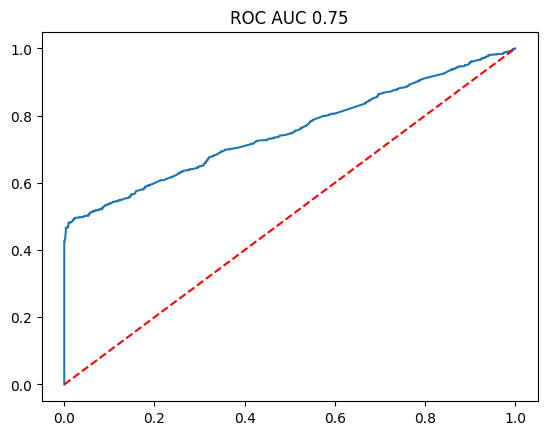

In [181]:
GBC_parms=tunning_Parameters(grid={'n_estimators':[50,100,150],'learning_rate':[0.1,0.5],'max_depth':[3,5,7]},
                              estimator=GradientBoostingClassifier(),x=x_train,y=y_train)
model_training(GradientBoostingClassifier(**GBC_parms),x_train,y_train,x_test,y_test)

XGboost

Fitting 5 folds for each of 18 candidates, totalling 90 fits


Confusion_matrix :
 [[831  32]
 [666 671]]

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.96      0.70       863
           1       0.95      0.50      0.66      1337

    accuracy                           0.68      2200
   macro avg       0.75      0.73      0.68      2200
weighted avg       0.80      0.68      0.68      2200



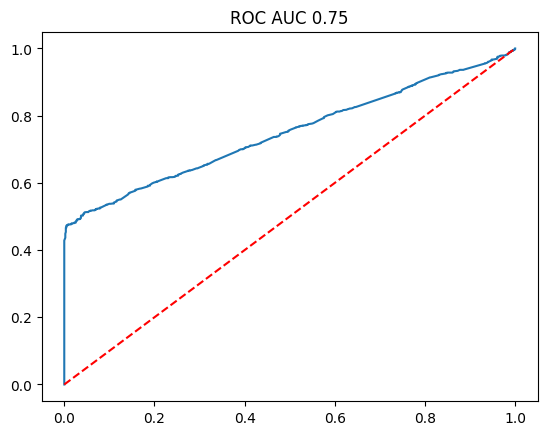

In [182]:
XGB_parms=tunning_Parameters(grid={'n_estimators':[50,100,150],'learning_rate':[0.1,0.5],'gamma':[1,2,3]},
                              estimator=XGBClassifier(),x=x_train,y=y_train)
model_training(XGBClassifier(**XGB_parms),x_train,y_train,x_test,y_test)

Voting 

In [183]:
base_model=[('XGB',XGBClassifier(**XGB_parms)),
            ('DT',DecisionTreeClassifier(**DT_parms)),
            ('GDBoost',GradientBoostingClassifier(**GBC_parms)),
            ("RF",RandomForestClassifier(**RF_parms))]

Confusion_matrix :
 [[807  56]
 [645 692]]

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.94      0.70       863
           1       0.93      0.52      0.66      1337

    accuracy                           0.68      2200
   macro avg       0.74      0.73      0.68      2200
weighted avg       0.78      0.68      0.68      2200



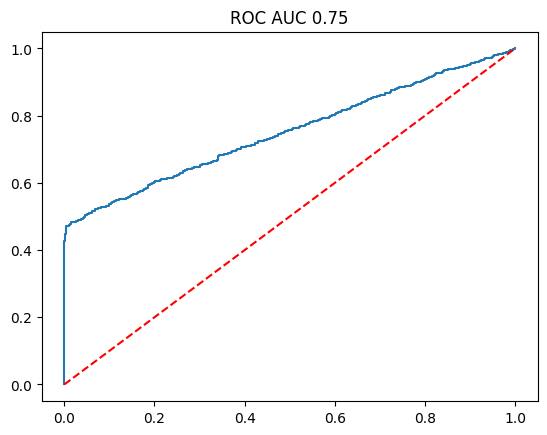

In [184]:
model_training(VotingClassifier(estimators=base_model,voting='soft',weights=(0.8,0.8,1.2,1.2)),x_train,y_train,x_test,y_test)

Stacking

Confusion_matrix :
 [[718 145]
 [557 780]]

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.83      0.67       863
           1       0.84      0.58      0.69      1337

    accuracy                           0.68      2200
   macro avg       0.70      0.71      0.68      2200
weighted avg       0.73      0.68      0.68      2200



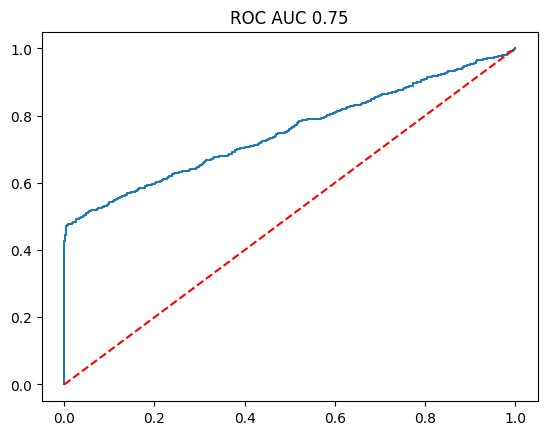

In [185]:
model_training(StackingClassifier(estimators=base_model,final_estimator=LogisticRegression()),x_train,y_train,x_test,y_test)

In [186]:
scorecard

,Accuracy,Precision,Recall,F1 Score,Cohen_Kappa Score
LogisticRegression(),0.632273,0.702144,0.685864,0.693908,0.233623
GaussianNB(),0.635455,0.896296,0.452506,0.601392,0.326937
MultinomialNB(),0.657727,0.777567,0.611818,0.684805,0.321830
DecisionTreeClassifier(max_depth=7),0.669091,0.903311,0.510097,0.652008,0.380073
"RandomForestClassifier(max_depth=4, max_features=None, n_estimators=90)",0.679545,0.946328,0.501122,0.655257,0.404791
"AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,\n n_estimators=120)",0.640909,0.699199,0.718025,0.708487,0.241246
GradientBoostingClassifier(n_estimators=50),0.680000,0.921438,0.517577,0.662835,0.400950
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=3, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=0.1, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=50, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",0.682727,0.954481,0.501870,0.657843,0.411237
"VotingClassifier(estimators=[('XGB',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None, device=None,\n early_stopping_rounds=None,\n enable_categorical=False,\n eval_metric=None,\n feature_types=None, gamma=3,\n grow_policy=None,\n importance_type=None,\n interaction_constraints=None,\n learning_rate=...\n min_child_weight=None, missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=50, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('DT', DecisionTreeClassifier(max_depth=7)),\n ('GDBoost',\n GradientBoostingClassifier(n_estimators=50)),\n ('RF',\n RandomForestClassifier(max_depth=4,\n n_estimators=90))],\n voting='soft', weights=(0.8, 0.8, 1.2, 1.2))",0.681364,0.925134,0.517577,0.663789,0.403830
"StackingClassifier(estimators=[('XGB',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None,\n device=None,\n early_stopping_rounds=None,\n enable_categorical=False,\n eval_metric=None,\n feature_types=None, gamma=3,\n grow_policy=None,\n importance_type=None,\n interaction_constraints=None,\n learning_rat...\n min_child_weight=None,\n missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=50, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('DT', DecisionTreeClassifier(max_depth=7)),\n ('GDBoost',\n GradientBoostingClassifier(n_estimators=50)),\n ('RF',\n RandomForestClassifier(max_depth=4,\n n_estimators=90))],\n final_estimator=LogisticRegression())",0.680909,0.843243,0.583396,0.689655,0.382968
